# IU Online Application Evaluation and Optimization

## Descriptive Analysis

---

#### Client: Sharon Wavle

---

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def describe_momentums(df):
    stats = df.describe(percentiles=[.5])
    stats.rename(index={'50%': 'median'}, inplace=True)
    stats = stats.reindex(['count', 'min', 'max', 'median', 'mean', 'std'])
    stats = stats.append(pd.Series(data=df.skew(), name='skew'))
    stats = stats.append(pd.Series(data=df.kurt(), name='kurt'))
    return stats

In [3]:
fname = 'data.csv'
df = pd.read_csv(fname, skiprows=range(1, 2))

print(df.columns.values)

['ID' 'StartDate' 'EndDate' 'Status' 'IPAddress' 'Progress'
 'Duration (in seconds)' 'Finished' 'RecordedDate' 'ResponseId'
 'RecipientLastName' 'RecipientFirstName' 'RecipientEmail'
 'ExternalReference' 'LocationLatitude' 'LocationLongitude'
 'DistributionChannel' 'UserLanguage' 'Q1_4' 'Q1_5' 'Q2' 'Q3' 'Q4' 'Q5'
 'Q6' 'Q7_1' 'Q7_2' 'Q7_3' 'Q8' 'Q9' 'Q10' 'Q11' 'Q13'
 'Q14_1 (Converted to Age)' 'Q15' 'Q16' 'Q17' 'Q18' 'Q19' 'Q20' 'Q21'
 'Q22' 'Q23_1' 'Q23_2' 'Q23_3' 'Q24' 'Q25' 'Q26' 'Q27' 'Q28' 'Q29' 'Q89'
 'Q30_8' 'Q30_9' 'Q30_3' 'Q30_4' 'Q30_5' 'Q30_6' 'Q30_2' 'Q31_3' 'Q31_4'
 'Q31_5' 'Q31_6' 'Q31_2' 'Q32' 'Q33' 'Q34_3' 'Q34_4' 'Q34_5' 'Q34_6'
 'Q34_2' 'Q35' 'Q36' 'Q37' 'Q38_1' 'Q38_3' 'Q38_4' 'Q38_5' 'Q38_6' 'Q39'
 'Q40' 'Q41' 'Q42' 'Q43_2' 'Q43_5' 'Q43_3' 'Q43_10' 'Q43_11' 'Q44' 'Q45_2'
 'Q45_5' 'Q45_4' 'Q45_11' 'Q45_12' 'Q46_2' 'Q46_5' 'Q46_4' 'Q46_11'
 'Q46_12' 'Q47_2' 'Q47_5' 'Q47_4' 'Q47_11' 'Q47_12' 'Q48' 'Q49_2' 'Q49_5'
 'Q49_4' 'Q49_10' 'Q49_11' 'Q50_2' 'Q50_5' 'Q50_4' 'Q50

/Users/guaj0/.virtualenvs/phd-infoviz/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (69,120,121,122,123,124,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,168,180) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Column refactoring

Some columns have very long names. It is more practical to refactor them.

In [4]:
df.rename(columns={'Duration (in seconds)': 'Duration'}, inplace=True)
df.rename(columns={'Q14_1 (Converted to Age)': 'Q14_1'}, inplace=True)
df.rename(columns={'Access Zip': 'AccessZip'}, inplace=True)
df.rename(columns={'Access Country': 'AccessCountry'}, inplace=True)
df.rename(columns={'Access Date': 'AccessDate'}, inplace=True)
df.rename(columns={'Access Time': 'AccessTime'}, inplace=True)
df.rename(columns={'Inquiry type': 'InquiryType'}, inplace=True)
df.rename(columns={'Mobile Device': 'MobileDevice'}, inplace=True)
df.rename(columns={'Mobile type': 'MobileType'}, inplace=True)
df.rename(columns={'UG Campus': 'UGCampus'}, inplace=True)
df.rename(columns={'Campus assignment': 'CampusAssignment'}, inplace=True)
df.rename(columns={'Q52_2 - Topics': 'Q52_2'}, inplace=True)
df.rename(columns={'56_5 - Topics': 'Q56_5'}, inplace=True)

print(df.columns.values)

['ID' 'StartDate' 'EndDate' 'Status' 'IPAddress' 'Progress' 'Duration'
 'Finished' 'RecordedDate' 'ResponseId' 'RecipientLastName'
 'RecipientFirstName' 'RecipientEmail' 'ExternalReference'
 'LocationLatitude' 'LocationLongitude' 'DistributionChannel'
 'UserLanguage' 'Q1_4' 'Q1_5' 'Q2' 'Q3' 'Q4' 'Q5' 'Q6' 'Q7_1' 'Q7_2'
 'Q7_3' 'Q8' 'Q9' 'Q10' 'Q11' 'Q13' 'Q14_1' 'Q15' 'Q16' 'Q17' 'Q18' 'Q19'
 'Q20' 'Q21' 'Q22' 'Q23_1' 'Q23_2' 'Q23_3' 'Q24' 'Q25' 'Q26' 'Q27' 'Q28'
 'Q29' 'Q89' 'Q30_8' 'Q30_9' 'Q30_3' 'Q30_4' 'Q30_5' 'Q30_6' 'Q30_2'
 'Q31_3' 'Q31_4' 'Q31_5' 'Q31_6' 'Q31_2' 'Q32' 'Q33' 'Q34_3' 'Q34_4'
 'Q34_5' 'Q34_6' 'Q34_2' 'Q35' 'Q36' 'Q37' 'Q38_1' 'Q38_3' 'Q38_4' 'Q38_5'
 'Q38_6' 'Q39' 'Q40' 'Q41' 'Q42' 'Q43_2' 'Q43_5' 'Q43_3' 'Q43_10' 'Q43_11'
 'Q44' 'Q45_2' 'Q45_5' 'Q45_4' 'Q45_11' 'Q45_12' 'Q46_2' 'Q46_5' 'Q46_4'
 'Q46_11' 'Q46_12' 'Q47_2' 'Q47_5' 'Q47_4' 'Q47_11' 'Q47_12' 'Q48' 'Q49_2'
 'Q49_5' 'Q49_4' 'Q49_10' 'Q49_11' 'Q50_2' 'Q50_5' 'Q50_4' 'Q50_10'
 'Q50_11' 'Q51_2' 'Q51_5' 'Q

### Understanding the time related information

In [5]:
time_df = df[['ID', 'StartDate', 'EndDate', 'Progress', 'Duration', 'Finished', 'RecordedDate', 'AccessDate', 
              'AccessTime']]

time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25616 entries, 0 to 25615
Data columns (total 9 columns):
ID              25616 non-null int64
StartDate       25616 non-null object
EndDate         25616 non-null object
Progress        25616 non-null int64
Duration        25616 non-null int64
Finished        25616 non-null bool
RecordedDate    25616 non-null object
AccessDate      25616 non-null object
AccessTime      25616 non-null object
dtypes: bool(1), int64(3), object(5)
memory usage: 1.6+ MB


In [6]:
num_df = time_df.select_dtypes(include=[np.number])
num_df = num_df.drop(['ID'], axis=1)
num_df.sample(3)

,Progress,Duration
14126,100,91
4545,8,142
5091,100,155


In [7]:
stats = describe_momentums(num_df)
stats

,Progress,Duration
count,25616.000000,2.561600e+04
min,0.000000,1.000000e+00
max,100.000000,7.696359e+06
median,100.000000,2.040000e+02
mean,72.730052,4.381541e+03
std,38.399267,1.045965e+05
skew,-0.838935,4.815231e+01
kurt,-1.080638,2.679066e+03


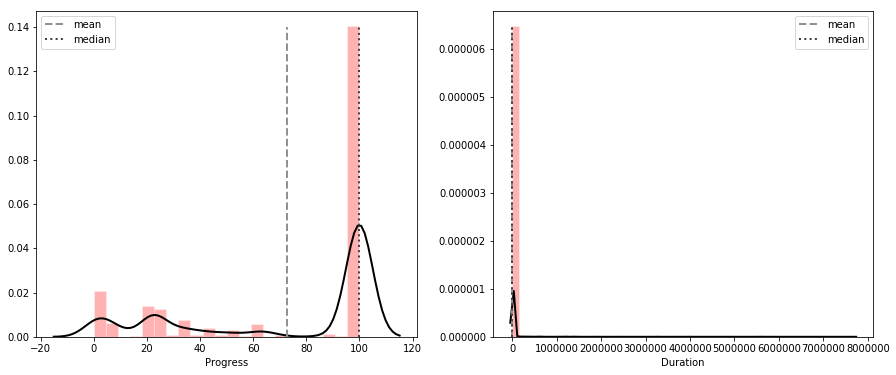

In [8]:
cols_labels = num_df.columns.values
rows = 1
cols = np.floor(len(cols_labels) / rows)
fig = plt.figure(figsize=(15, 6))
for i in range(len(cols_labels)):
    ax = fig.add_subplot(rows, cols, i + 1)
    column = cols_labels[i]
    ax = sns.distplot(num_df[column].dropna(), hist_kws={'color': 'r', 'ec': 'w', 'alpha': 0.3}, 
                      kde_kws={'color': 'k', 'lw': 2}, ax=ax)
    mean = ax.axvline(stats[column].loc['mean'], ymax=0.95, color='#919191', label='mean', ls='--', lw=2)
    median = ax.axvline(stats[column].loc['median'], ymax=0.95, color='#404040', label='median', ls=':', lw=2)
    plt.legend(handles=[mean, median])

In [9]:
cat_df = time_df.select_dtypes(include=[np.object])
cat_df.loc[:, 'Finished'] = df['Finished']
cat_df.sample(3)

/Users/guaj0/.virtualenvs/phd-infoviz/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/guaj0/.virtualenvs/phd-infoviz/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,StartDate,EndDate,RecordedDate,AccessDate,AccessTime,Finished
1291,11/5/17 13:31,11/5/17 13:32,11/5/17 13:32,11/5/17,13:31:04,True
1352,11/7/17 10:33,11/7/17 10:42,11/7/17 10:42,11/7/17,10:33:46,True
5589,1/25/18 9:57,1/25/18 9:57,1/26/18 9:58,1/25/18,9:57:27,False


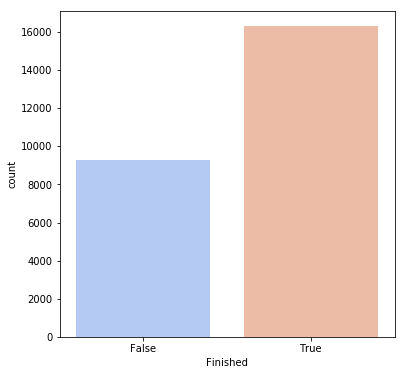

In [10]:
cols_labels = cat_df[['Finished']].columns.values
rows = 1
cols = np.ceil(len(cols_labels) / rows)
fig = plt.figure(figsize=(6, 6))
for i in range(len(cols_labels)):
    ax = fig.add_subplot(rows, cols, i + 1)
    column = cols_labels[i]
    ax = sns.countplot(cat_df[column], palette='coolwarm')

### Understanding the user related information

In [11]:
user_df = df[['ID', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'AccessZip', 'AccessCountry']]

user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25616 entries, 0 to 25615
Data columns (total 6 columns):
ID                    25616 non-null int64
RecipientLastName     0 non-null float64
RecipientFirstName    0 non-null float64
RecipientEmail        0 non-null float64
AccessZip             22156 non-null object
AccessCountry         25604 non-null object
dtypes: float64(3), int64(1), object(2)
memory usage: 1.2+ MB


### Understanding the metadata

In [12]:
meta_df = df[['ID', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 
              'UserLanguage', 'source', 'type', 'program_id', 'user', 'InquiryType', 'Q_R_DEL', 'audience', 'date', 
              'level', 'program', 'subject', 'created', 'MobileDevice', 'MobileType', 'UGCampus', 'Grad_prog', 
              'Grad_contact', 'Administrative', 'CampusAssignment', 'Q52_2', 'Q56_5']]

meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25616 entries, 0 to 25615
Data columns (total 29 columns):
ID                     25616 non-null int64
ExternalReference      0 non-null float64
LocationLatitude       0 non-null float64
LocationLongitude      0 non-null float64
DistributionChannel    25616 non-null object
UserLanguage           24385 non-null object
source                 25400 non-null object
type                   25399 non-null object
program_id             11921 non-null float64
user                   53 non-null float64
InquiryType            23830 non-null object
Q_R_DEL                2136 non-null object
audience               1228 non-null object
date                   1115 non-null float64
level                  6111 non-null object
program                6111 non-null object
subject                1806 non-null object
created                0 non-null float64
MobileDevice           11231 non-null object
MobileType             2823 non-null object
UGCampus   